# <center>Estimasi Nilai $\pi$ dengan Monte Carlo</center>

Monte Carlo (MC) merupakan sebuah algoritme matematis yang berdasarkan simulasi dari nilai-nilai random yang diulang berkali-kali untuk memprediksi distribusi suatu fenomena yang banyak digunakan untuk analisis resiko dan pengambilan keputusan.

Items:
- Estimasi luas lingkaran dengan MC.
- Estimasi nilai 𝜋 dengan MC.
- Menghitung error relative dari estimasi 𝜋 dengan MC.

### Fungsi Lingkaran:
$$L((x_0,y_0),r)	\equiv (x-x_0)^2+(y-y_0)^2=r^2$$
Merupakan suatu lingkaran yang berpusat di $(x_0,y_0)$ (contoh: _titik $\times$ pada gambar di bawah_) dengan jari-jari $r$. Titik-titik $(x,y)$ yang memenuhi persamaan tersebut merupakan suatu titik yang berada di garis lingkaran $L((x_0,y_0),r)	$.


**Note: jari-jari, $r$, merupakan jarak dari titik pusat lingkaran  $(x_0,y_0)$ ke tepi/garis lingkaran, atau setengah dari diameter lingkaran.** 

Penjelasan mudahnya:
*  Jika suatu titik $(x,y)$ sedemikian hingga $(x-x_0)^2+(y-y_0)^2 < r^2$, maka titik tersebut berada di **dalam** lingkaran $L((x_0,y_0),r)	$ -- 
(cth: titik $\triangle$).
*  Jika suatu titik $(x,y)$ sedemikian hingga $(x-x_0)^2+(y-y_0)^2 > r^2$, maka titik tersebut berada di **luar** lingkaran $L((x_0,y_0),r)	$ -- (cth: titik $+$).
*  Jika suatu titik $(x,y)$ sedemikian hingga $(x-x_0)^2+(y-y_0)^2 = r^2$, maka titik tersebut berada **tepat di garis** lingkaran $L((x_0,y_0),r)	$ -- (cth: titik $\bigcirc$).

![alt text](https://github.com/sykrn/py-dts/blob/master/asets/linkaran.png?raw=true)



**1. Buat sebuah fungsi `isPointInCircle` dengan positional argument `x, y, r` dan keyword argument `center` dengan default value sebuah tupple dua nilai `(0,0)`. Untuk menentukan apakah titik `(x,y)` berada di dalam atau di luar lingkaran $L(\rm{center},r)$. Keluaran fungsi `isPointInCircle` merupakan suatu nilai boolean, `True` Jika titik `(x,y)` berada di dalam lingkaran dan `False` Jika berada di luar.**

**Note: titik yang berada tepat di lingkaran dikategorikan sebagai dalam, maka `True`.**

In [2]:
def isPointInCircle(x,y,r,center=(0,0)):
    if (center[0]-x)**2 + (center[1]-y)**2 <= r**2:
        return True
    else:
        return False

In [3]:
# Sanity Check!
print(isPointInCircle(1,1,1,center=(0,0)),isPointInCircle(1,0,1,center=(0,0)),
      isPointInCircle(1,1,1,center=(1,0)),isPointInCircle(0,0,1,center=(1,1)))

False True True False


**2. `generateRandomSquarePoints` dengan dua positional argument `n` dan `length`, dan keyword argument `center` default: tupple`(0,0)`. Fungsi ini akan mengeluarkan suatu list dengan jumlah `n` titik random `[x,y]` yang berada di dalam suatu kotak persegi dengan panjang `length` dan titik tengah `center`. Keluaran fungsi merupakan list dari `n` titik random `[x,y]`. Contoh: `[[x1,y1],...,[xn,yn]]`.**

In [4]:
import random

def generateRandomSquarePoints(n,length,center=(0,0)):
  # MULAI KODEMU DI SINI
  minx = center[0]-length/2
  miny = center[1]-length/2
  maxx = center[0]+length/2
  maxy = center[1]+length/2
  
  # Gunakan list comprehension dengan variable minx, miny, length, dan n
  points = [[random.uniform(minx, maxx),random.uniform(miny, maxy)] for i in range(n)]

  return points

In [5]:
# Sanity Check!
random.seed(0)

# generate 100 point di dalam persegi dengan panjang sisi 1 dan berpusat di (0,0)
points = generateRandomSquarePoints(100,1)
print(points[10:15])

[[-0.18985243068066737, 0.22983174826012864], [0.3988382879679935, 0.18398393191544127], [-0.027857284547286643, -0.3992987919316342], [-0.06582816454621632, 0.1108869734438016], [0.4130110532378982, 0.4666063677707588]]


**Cek Visualisasi Output**

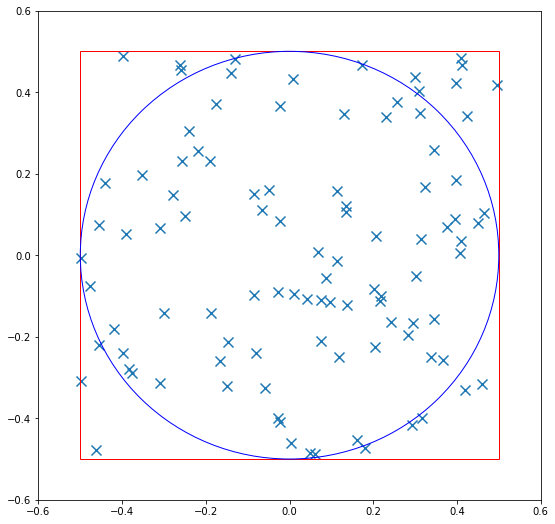

In [17]:
import matplotlib.pyplot as plt
x,y = zip(*points)

# persegi dengan panjang sisi 1 dan berpusat di (0,0)
r1 = plt.Rectangle((-0.5,-0.5),1,1,color='r', fill=False)
c1 = plt.Circle((0,0), 0.5, color='b', fill=False)
fig, ax = plt.subplots(figsize=(9,9)) 
ax.add_artist(r1)
ax.add_artist(c1)
plt.xlim(-0.6,0.6)
plt.ylim(-0.6,0.6)
plt.scatter(x,y,s=100,marker='x')
plt.show()

### Menghitung Luas Lingkaran dengan Estimasi MC
![alt text](https://github.com/sykrn/py-dts/blob/master/asets/persegilink.png?raw=true)

#### Kita bisa mengestimasi luas lingkaran dengan MC sebagai berikut.
1. Buatlah titik-titik random sebanyak mungkin di dalam sebuah persegi yang bersinggungan dengan lingkaran yang berada di dalamnya yang akan kita hitung luasannya seperti gambar di atas.
2. Hitunglah jumlah titik-titik yang berada di dalam lingkaran tersebut.
3. Estimasi:

$$\frac{n_{titik-dalam-lingkaran}}{n_{total-titik}}=\frac{Luas Lingkaran}{Luas Persegi}$$
maka,
$$Luas Lingkaran=\frac{n_{titik-dalam-lingkaran}}{n_{total-titik}}\times Luas Persegi$$
di mana,
$$Luas Persegi = sisi \times sisi$$
mudah untuk dihitung.

**3. Buatlah fungsi `MCCircleArea` dengan positional argument `r` dan keyword argument dengan default `n=100` dan `center=(0,0)`, untuk menghitung luas lingkaran dengan jari-jari r dengan mengestimasi dari `n` titik random. Keluaran fungsi merupakan suatu nilai yang menunjukkan estimasi luas lingkaran tersebut.**

**Hint:**
1. Gunakan fungsi yang sudah dibuat di atas `isPointInCircle` dan `generateRandomSquarePoints`.
2. Perhatikan gambar lingkaran dan persegi di atas, jari-jari $r$ lingkaran sama dengan setengah dari panjang sisi persegi.
3. Lingkaran dan persegi memiliki pusat yang sama.

In [10]:
def MCCircleArea(r,n=100,center=(0,0)):
    points = generateRandomSquarePoints(n,r*2)
    counter = 0
    for i in range (n):
        if isPointInCircle(points[i][0], points[i][1], r) == True:
            counter += 1
    return ((counter/n)*((r*2)**2))

In [11]:
# Sanity check!

random.seed(0)
print(MCCircleArea(1,100),MCCircleArea(1,10,center=(10,10)))

3.28 3.2


### Estimasi $\pi$

#### Luas lingkaran
$$Luas = \pi r^2$$

Sehingga untuk mengestimasi nilai $\pi$ sama dengan mengestimasi luas lingkaran dengan jari-jari $r=1$.

#### Law of Large Numbers (LLN)
LLN merupakan hukum statistik dimana kita bisa menghitung nilai rata-rata dari suatu distribusi atau bahkan standar deviasinya dengan menggunakan banyak sampel. LLN umum digunakan di dalam metode MC.

Penjelasan mudahnya: semakin banyak sampel semakin akurat untuk menghitung rata-rata atau nilai mean-nya. 

#### Estimasi $\pi$ lebih akurat dengan LLN
1. Estimasi luas lingkaran dengan jari-jari satu dengan menggunakan sejumlah titik-titik random.
2. Lakukan sebanyak mungkin langkah 1.
3. Ambil nilai rata-ratanya, yaitu $\mu = \sum x/n$, yang merupakan estimasi akhir dari metode MC.

**4. Buatlah fungsi `LLNPiMC` untuk mengestimasi nilai `pi` dengan positional argument `nsim` dan `nsample`. `nsample` merupakan jumlah sample titik-titik random untuk menghitung luas lingkaran berjari-jari 1 (maka Luas = $\pi$) dan `nsim` merupakan jumlah simulasi untuk menghitung nilai rata-rata atau mean dari estimasi nilai $\pi$. Keluaran fungsi merupakan nilai mean dari simulasi tersebut (estimasi nilai $\pi$).**

In [12]:
def LLNPiMC(nsim,nsample):
    total = 0
    #MCCircleArea(1,nsample)
    for i in range (nsim):
        total += MCCircleArea(1,nsample)
    return total/nsim

In [13]:
# Sanity Check!
import math

random.seed(0)
estpi = LLNPiMC(10000,500)

print('est_pi:',estpi)
print('act_pi:',math.pi)

est_pi: 3.1416055999999823
act_pi: 3.141592653589793


### Menghitung Error Relatif

$$E = \|\frac{estimasi-aktual}{aktual}\|\times 100$$

$\|\dots\|$ merupakan nilai absolut atau mutlak (selalu positif).

**5. Buatlah fungsi `relativeError`, dengan argument `act` yang merupakan nilai aktual, dan `est` yang merupakan nilai estimasi.**

In [15]:
def relativeError(act,est):
    return (abs((est-act)/act)*100)

In [16]:
# Sanity check!
print('error relatif:',relativeError(math.pi,estpi),'%')

error relatif: 0.0004120970353822341 %
